In [1]:
# !pip install tensorflow
#!pip install transformers
#!pip install tf-keras
# !pip install imblearn

In [3]:
import sys
from pathlib import Path

# Zum übergeordneten Ordner 'src' wechseln
current_path = Path().resolve()
src_path = current_path.parents[4]  # Zwei Stufen nach oben

if str(src_path) not in sys.path:
    sys.path.append(str(src_path))

src_path


WindowsPath('C:/Users/Nasiba/Documents/1 Master Data Science/Projektpraktikum/WebScience24')

In [10]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import  classification_report, confusion_matrix


pd.set_option('display.max_colwidth', None)
from sklearn.model_selection import train_test_split

from vector_functions import vectorize_fasttext_words, vectorize_fasttext_test_data_words

from tensorflow.keras.models import load_model

import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Embedding

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import ReduceLROnPlateau

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef


#### Beladung der Daten

In [6]:

source_filepath_name = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/train_cleaned_rnn.csv'))

df_cleaned = pd.read_csv(source_filepath_name, encoding='utf-8', index_col=0)

source_filepath_name_test = os.path.abspath(os.path.join(src_path, 'data/mixed_dataset/test_cleaned_rnn.csv'))

df_cleaned_test = pd.read_csv(source_filepath_name_test, encoding='utf-8', index_col=0)


df_cleaned.head(1)


,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
140232,0,"Nicki's ""that's not good"" pout bought to you by Botox[™]. #MKR","nickis ""thats not good"" pout bought to you by botox trade mark mkr",0,['#mkr'],__trade_mark__


### Vektorisierung

#### Fasttext

In [7]:



X_train_vectors_fast_word, X_test_vectors_fast_word, y_train_fast_word, y_test_fast_word, ft_model_word = vectorize_fasttext_words(df=df_cleaned, text_column ="tweet_cleaned", label_column="label")

X_test_data_vectors_test_fast_word , y_test_data_test_fast_word, ft_model_test= vectorize_fasttext_test_data_words(df=df_cleaned_test, text_column ="tweet_cleaned", label_column="label")


c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_2\vector_functions.py:399: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)
c:\Users\Nasiba\Documents\1 Master Data Science\Projektpraktikum\WebScience24\src\3. Deep Learning Approach\nasiba\Training\Phase_2\vector_functions.py:452: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[text_column] = df[text_column].astype(str)


In [8]:
X_train_vectors_fast_word = np.expand_dims(X_train_vectors_fast_word, axis=1)
X_test_vectors_fast_word = np.expand_dims(X_test_vectors_fast_word, axis=1)
X_test_data_vectors_test_fast_word = np.expand_dims(X_test_data_vectors_test_fast_word, axis=1)
print(X_train_vectors_fast_word.shape)
print(X_test_data_vectors_test_fast_word.shape)
print(X_test_data_vectors_test_fast_word.shape)


(58313, 1, 200)
(32529, 1, 200)
(32529, 1, 200)


### Modell aufbauen 

#### Modeltraining mit anderen Parametern

(Aktivierungsfunktion in der Dense-Schicht zu sigmoid ändern,class_wight hinzufügen)

In [ ]:
samples, max_seq_len, vector_size = X_train_vectors_fast_word.shape
num_classes = len(np.unique(y_train_fast_word))


# y_train_onehot = to_categorical(y_train, num_classes=num_classes)
# y_test_onehot = to_categorical(y_test, num_classes=num_classes)
# y_test_onehot_data = to_categorical(y_test_data, num_classes=num_classes)

# Modellinitialisierung
model_3 = Sequential()

# LSTM-Schicht
model_3.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_3.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_3.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3} 
history_3 = model_3.fit(
    X_train_vectors_fast_word, np.array(y_train_fast_word),
    validation_data=(X_test_vectors_fast_word, np.array(y_test_fast_word)),
    epochs=10,
    batch_size=32,
    class_weight=class_weight,
    verbose=2
)


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1823/1823 - 10s - 6ms/step - accuracy: 0.7680 - loss: 0.7573 - recall: 0.5053 - val_accuracy: 0.7695 - val_loss: 0.4775 - val_recall: 0.5989
Epoch 2/10
1823/1823 - 8s - 4ms/step - accuracy: 0.7646 - loss: 0.7246 - recall: 0.5829 - val_accuracy: 0.8175 - val_loss: 0.4045 - val_recall: 0.4002
Epoch 3/10
1823/1823 - 7s - 4ms/step - accuracy: 0.7693 - loss: 0.7128 - recall: 0.6140 - val_accuracy: 0.7806 - val_loss: 0.4530 - val_recall: 0.6292
Epoch 4/10
1823/1823 - 7s - 4ms/step - accuracy: 0.7715 - loss: 0.7013 - recall: 0.6277 - val_accuracy: 0.7919 - val_loss: 0.4341 - val_recall: 0.6020
Epoch 5/10
1823/1823 - 7s - 4ms/step - accuracy: 0.7732 - loss: 0.6919 - recall: 0.6343 - val_accuracy: 0.8001 - val_loss: 0.4173 - val_recall: 0.5864
Epoch 6/10
1823/1823 - 8s - 4ms/step - accuracy: 0.7766 - loss: 0.6821 - recall: 0.6434 - val_accuracy: 0.7867 - val_loss: 0.4341 - val_recall: 0.6421
Epoch 7/10
1823/1823 - 8s - 4ms/step - accuracy: 0.7772 - loss: 0.6783 - recall: 0.6563 - val

In [11]:
# Vorhersagen auf Testdaten
predictions_3 = model_3.predict(X_test_data_vectors_test_fast_word)
threshold = 0.35  # Oder teste 0.4 oder 0.6
predicted_classes_fast_word = (predictions_3 > threshold).astype(int)

1017/1017 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


 F1-Score (Klasse 2): 0.1275
 Recall (Klasse 2): 0.0788
 Precision (Klasse 2): 0.3346
 Accuracy (gesamt): 0.7732
 MCC: 0.0695
Confusion Matrix:
 [[24613  1072]
 [ 6305   539]]


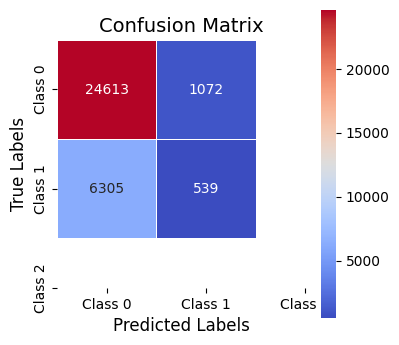

In [12]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data_test_fast_word, predicted_classes_fast_word, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data_test_fast_word, predicted_classes_fast_word)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data_test_fast_word, predicted_classes_fast_word)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data_test_fast_word, predicted_classes_fast_word)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Earlystop Aktivierung + Dropout Standard gelassen + epochen erhöhung + learning rate dynamisieren

In [13]:

samples, max_seq_len, vector_size = X_train_vectors_fast_word.shape
num_classes = len(np.unique(y_train_fast_word))
# Modellinitialisierung
model_21 = Sequential()

# LSTM-Schicht
model_21.add(LSTM(units=128, input_shape=(max_seq_len, vector_size), return_sequences=False))

# Optional: Dropout zur Vermeidung von Overfitting
model_21.add(Dropout(0.5))

# Dense-Schicht für die Ausgabe
model_21.add(Dense(units=1, activation='sigmoid'))

# Kompilieren des Modells mit verbesserter Lernrate
model_21.compile(optimizer=Adam(),
                 loss='binary_crossentropy',
                 metrics=['accuracy', Recall()])

class_weight = {0: 1, 1: 3}
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

history_21 = model_21.fit(
    X_train_vectors_fast_word, np.array(y_train_fast_word),
    validation_data=(X_test_vectors_fast_word, np.array(y_test_fast_word)),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping,reduce_lr],
    class_weight=class_weight,
    verbose=2
)

# Vorhersagen auf Testdaten
predictions_21= model_21.predict(X_test_data_vectors_test_fast_word)
threshold = 0.35 # Oder teste 0.4 oder 0.6
predicted_classes_21 = (predictions_21 > threshold).astype(int)



Epoch 1/50


C:\Users\Nasiba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1823/1823 - 10s - 5ms/step - accuracy: 0.7666 - loss: 0.7574 - recall_1: 0.5065 - val_accuracy: 0.7941 - val_loss: 0.4517 - val_recall_1: 0.5099 - learning_rate: 0.0010
Epoch 2/50
1823/1823 - 8s - 4ms/step - accuracy: 0.7674 - loss: 0.7230 - recall_1: 0.5887 - val_accuracy: 0.7852 - val_loss: 0.4508 - val_recall_1: 0.5743 - learning_rate: 0.0010
Epoch 3/50
1823/1823 - 8s - 4ms/step - accuracy: 0.7679 - loss: 0.7102 - recall_1: 0.6119 - val_accuracy: 0.7972 - val_loss: 0.4289 - val_recall_1: 0.5691 - learning_rate: 0.0010
Epoch 4/50
1823/1823 - 7s - 4ms/step - accuracy: 0.7696 - loss: 0.6999 - recall_1: 0.6256 - val_accuracy: 0.7596 - val_loss: 0.4731 - val_recall_1: 0.7099 - learning_rate: 0.0010
Epoch 5/50
1823/1823 - 7s - 4ms/step - accuracy: 0.7733 - loss: 0.6926 - recall_1: 0.6386 - val_accuracy: 0.7719 - val_loss: 0.4538 - val_recall_1: 0.6873 - learning_rate: 0.0010
Epoch 6/50
1823/1823 - 7s - 4ms/step - accuracy: 0.7759 - loss: 0.6841 - recall_1: 0.6459 - val_accuracy: 0.7628 - 

In [17]:
# Vorhersagen auf Testdaten
predictions_21= model_21.predict(X_test_data_vectors_test_fast_word)
threshold = 0.35 # Oder teste 0.4 oder 0.6
predicted_classes_21 = (predictions_21 > threshold).astype(int)

1017/1017 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


 F1-Score (Klasse 2): 0.1667
 Recall (Klasse 2): 0.1090
 Precision (Klasse 2): 0.3539
 Accuracy (gesamt): 0.7707
 MCC: 0.0927
Confusion Matrix:
 [[24323  1362]
 [ 6098   746]]


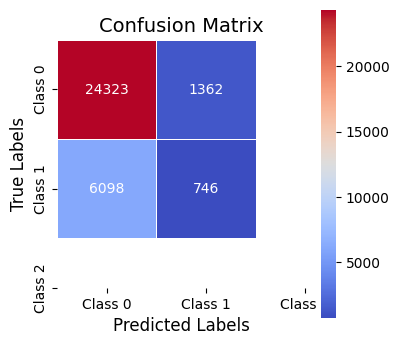

In [ ]:
# Klassifikationsbericht erstellen (als Dictionary)
report = classification_report(y_test_data_test_fast_word, predicted_classes_21, output_dict=True)

# Metriken NUR für Klasse 2 extrahieren
precision_class_2 = report["1"]["precision"]
recall_class_2 = report["1"]["recall"]
f1_class_2 = report["1"]["f1-score"]

# Gesamtgenauigkeit berechnen
accuracy = accuracy_score(y_test_data_test_fast_word, predicted_classes_21)

# Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test_data_test_fast_word, predicted_classes_21)

# Ergebnisse ausgeben (nur für Klasse 2)
print(f" F1-Score (Klasse 2): {f1_class_2:.4f}")
print(f" Recall (Klasse 2): {recall_class_2:.4f}")
print(f" Precision (Klasse 2): {precision_class_2:.4f}")
print(f" Accuracy (gesamt): {accuracy:.4f}")
print(f" MCC: {mcc:.4f}")

# Confusion Matrix berechnen
cm = confusion_matrix(y_test_data_test_fast_word, predicted_classes_21)
print("Confusion Matrix:\n", cm)

# Verwirrungsmatrix visualisieren
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", linewidths=0.5, square=True,
            xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

Modell speichern

In [ ]:
save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/models/model_21_fast.keras'))
# Erstelle das Verzeichnis, falls es nicht existiert
os.makedirs(os.path.dirname(save_path_model), exist_ok=True)
#save_path_model = os.path.abspath(os.path.join(src_path, 'src/3. Deep Learning Approach/nasiba/model_17.h5')) 
model_21.save(save_path_model)
print(f"Modell wurde erfolgreich gespeichert unter: {save_path_model}")